In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import warnings 
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
data = pd.read_csv('anime.csv')
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
data.describe()  #describing data 

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [4]:
data.shape

(12294, 7)

In [5]:
data.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [6]:
data.isnull().sum()   #finding null values

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [7]:
# Fill missing 'genre' and 'type' with 'Unknown', and 'rating' with the median value
data['genre'] = data['genre'].fillna('Unknown')
data['type'] = data['type'].fillna('Unknown')
data['rating'] = data['rating'].fillna(data['rating'].median())

In [8]:
# verification of missing value
data.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

# Feature Extraction

In [9]:
data['genre'].value_counts()

genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: count, Length: 3265, dtype: int64

In [10]:
data['episodes'].value_counts()

episodes
1      5677
2      1076
12      816
13      572
26      514
       ... 
358       1
366       1
201       1
172       1
125       1
Name: count, Length: 187, dtype: int64

In [11]:
data['type'].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Unknown      25
Name: count, dtype: int64

<Axes: xlabel='type'>

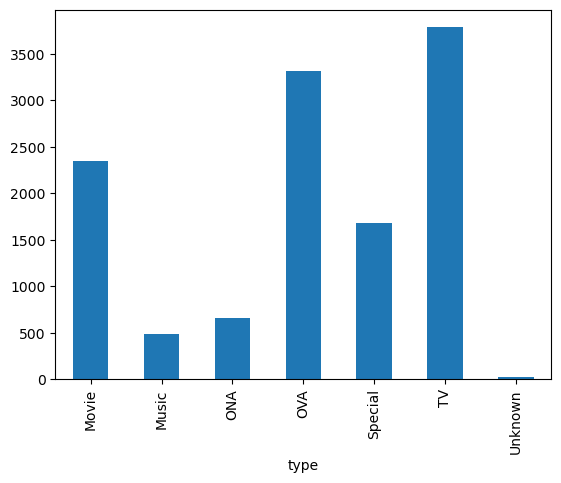

In [12]:
data['type'].value_counts().sort_index().plot(kind='bar')    #Ploting bar chart 

In [13]:
# Normalization of rating and coverting categorical numric (genre)
gerne_enco = data['genre'].str.get_dummies(sep=', ')

scal = StandardScaler()
norm_rating = scal.fit_transform(data[['rating']])

# combine into a single DataFrame
feature_df = pd.concat([gerne_enco, pd.DataFrame(norm_rating, columns=['norm_rating'])])
feature_df.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,norm_rating
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [14]:
genre_enco =data['genre'].str.get_dummies(sep=',')

In [27]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
genre_matrix = vectorizer.fit_transform(data['genre'])

In [16]:
print(genre_matrix.shape)

(12294, 44)


In [17]:
# computing cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(genre_matrix,genre_matrix)

In [18]:
# normalising of rating.
scal = StandardScaler()
norm_rating = scal.fit_transform(data[['rating']])

In [19]:
# combining feature
feature_df = pd.concat([gerne_enco, pd.DataFrame(norm_rating, columns=['norm_rating'])],axis=1)

# Recommendation System

In [21]:
# computing cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(feature_df)

In [22]:
# Recommendation Function
def recommend_anime(anime_title, similarity_matrix, data, top_n=10):
    anime_idx = data[data['name'] == anime_title].index[0]
    similarity_scores = list(enumerate(similarity_matrix[anime_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similar_anime_indices = [i[0] for i in similarity_scores[1:top_n+1]]
    return data['name'].iloc[similar_anime_indices]

In [24]:
call = recommend_anime("Kimi no Na wa.", similarity_matrix, data, top_n=5)
print("recommedation for 'Kimi no Na wa.': ")
print(call)

recommedation for 'Kimi no Na wa.': 
208                        Kokoro ga Sakebitagatterunda.
504    Clannad: After Story - Mou Hitotsu no Sekai, K...
60                                    Hotarubi no Mori e
10                                  Clannad: After Story
219    Yahari Ore no Seishun Love Comedy wa Machigatt...
Name: name, dtype: object


In [25]:
call = recommend_anime("Under World", similarity_matrix, data, top_n=5)
print("recommedation for 'Under World': ")
print(call)

recommedation for 'Under World': 
12287                          Tenshi no Habataki Jun
12288                                The Satisfaction
12260                         Hokenshitsu de Aimashou
12289    Toushindai My Lover: Minami tai Mecha-Minami
12267                                   Lovely Series
Name: name, dtype: object


# Interview Questions

### 1. Can you explain the difference between user-based and item-based collaborative filtering?

User-Based Collaborative Filtering: User-based collaborative filtering recommends items to a user based on the preferences of similar users.
It identifies users who are similar to the target user based on their ratings or interactions with items. It then recommends items that those similar users have liked or interacted with but the target user has not yet seen.

Item-Based Collaborative Filtering: Item-based collaborative filtering recommends items based on the similarity between items.
It identifies items that are similar to the ones the target user has rated highly or interacted with. It then recommends these similar items to the user.

### 2. What is collaborative filtering, and how does it work?

Collaborative filtering is a recommendation system technique that predicts the preferences of a user by collecting preferences from many users (collaborating).
It works by finding similarities between users (user-based) or items (item-based) and making recommendations based on these similarities.